<a href="https://colab.research.google.com/github/cierrakoen/ML_Hotel_Cancellation_Predictor/blob/main/ML_Hotel_cancellations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating Imports

In [ ]:
import seaborn as sns
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"] = 10, 5
%matplotlib inline
import json
import csv
import os
from pandas.api.types import is_numeric_dtype
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression, Perceptron
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline

### Report must include different ML models with 3 different sampling evaluations (50-50, 70-30, and 80-20)


1. Decision Tree/Random Forest - Ike
2. Perceptron - Cierra 
3. Naive Bayes - Omari
4. Logistic Regression - Ike
5. Linear Regression - Cierra 
6. SVM - Linear Kernel - Omari 
7. SVM - RBF kernel - Ike
8. Gradient Boosting - Cierra 
9. Multi-layer Perceptron (MLP) - Omari



#Creating a way to read the csv

Information on how to get the data set: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/



*   FYI: all downloads will be found under content 
*   Don't forget to remove your API key (kaggle.json)
*

In [ ]:
#data = pd.read_csv("sample_data/hotel_bookings.csv")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Ikehub/ML_Project/main/hotel_bookings.csv")

# Data Cleaning

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
# for col in df.describe(include = 'all').columns:
#     print(col)
#     print(df[col].unique())
#     print('-'*50)

There are 4 columns with NaN values


*   For the children column, na values most likely mean a value of 0
*   The rows agent and company most likely signify the booking was made without an agent/company. So, I gave nan values of 0
*   For country, I ended up deciding to drop the rows without because imputing would most likey corrupt the dataset
*   There was an Undefined value for meals which would mean Self Catering (SC)
*   I dropped the rows without any persons in the booking as that is most likely an error in the dataset



In [ ]:
df["children"] = df["children"].fillna(0)
df["agent"] = df["agent"].fillna(0)
df["company"] = df["company"].fillna(0)
df = df[df["country"].notna()]
df["meal"].replace("Undefined", "SC", inplace=True)
df = df[df["adults"] + df["babies"] + df["children"] != 0]

<ipython-input-12-e31e6a998f39>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["meal"].replace("Undefined", "SC", inplace=True)


In [ ]:
df.shape

(118732, 32)

In [ ]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,118732,118732,118732,118732,118732,118732,118732,118732,118732,118732,118732,118732
unique,2,12,4,177,8,5,9,11,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79147,13840,91793,48483,56334,97612,85480,73830,103997,89046,74590,1460


In [ ]:
df.corr()["is_canceled"].abs().sort_values(ascending=False)

<ipython-input-14-0d68869f4b4b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["is_canceled"].abs().sort_values(ascending=False)


is_canceled                       1.000000
lead_time                         0.291548
total_of_special_requests         0.235874
required_car_parking_spaces       0.195018
booking_changes                   0.145147
previous_cancellations            0.109902
is_repeated_guest                 0.084146
company                           0.082211
adults                            0.056157
previous_bookings_not_canceled    0.055504
days_in_waiting_list              0.054105
agent                             0.046885
adr                               0.044819
babies                            0.032608
stays_in_week_nights              0.024796
arrival_date_year                 0.016335
arrival_date_week_number          0.007681
arrival_date_day_of_month         0.006048
children                          0.004523
stays_in_weekend_nights           0.002230
Name: is_canceled, dtype: float64

In [ ]:
print(df["is_canceled"].value_counts())
print(df["reservation_status"].value_counts())
print(df.groupby("is_canceled")["reservation_status"].value_counts())

0    74590
1    44142
Name: is_canceled, dtype: int64
Check-Out    74590
Canceled     42940
No-Show       1202
Name: reservation_status, dtype: int64
is_canceled  reservation_status
0            Check-Out             74590
1            Canceled              42940
             No-Show                1202
Name: reservation_status, dtype: int64


* We see here that reservation_status is 100% correlated with is_canceled as rows with check-out value did not cancel and rows with canceled/no-show are obviously canceled
* Therefore, this column should be dropped as it has no use in predicting possible cancellations of bookings

In [ ]:
df.drop(["reservation_status", "reservation_status_date"], axis=1, inplace=True)

# Creating X and y values
 

In [ ]:
X = df.drop(["is_canceled"], axis=1)
y = df["is_canceled"]

cat_features = [col for col in X.columns if X[col].dtype == "object"]
num_features = [col for col in X.columns if is_numeric_dtype(X[col])]
print(cat_features)
print(num_features)

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


# One Hot Encoder
- allows for us to fit our categorical data into unique integers just so that the X values can be used in our model without breaking 
documentation: https://colab.research.google.com/drive/1LsyqJ9HJl0IdluTNS9_I9wlWMrXb92jr#scrollTo=EwgY0ZoLeoXG&line=2&uniqifier=1

In [ ]:
one_hot = OneHotEncoder(handle_unknown="ignore")
scaler = StandardScaler()
ct = ColumnTransformer(transformers=[("cat_preprocess", one_hot, cat_features),
                                     ("num_preprocess", scaler, num_features)])

X_trans = ct.fit_transform(X) 

# Training and test split for each sample evaluation 

- Must have 3 different sampling evaluations (50-50, 70-30, and 80-20)

In [ ]:
seed = 1234
splits = [20, 30, 50]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.30, random_state=seed)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.50, random_state=seed)

# Plotting the learning curve

In [ ]:
def plot_learning_curve(clf, X_train, y_train, axs):
  train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, cv=10, n_jobs=-1, scoring="")
  train_mean = train_scores.mean(axis=1)
  test_mean = test_scores.mean(axis=1)
  axs.plot(train_sizes, train_mean, label="train")
  axs.plot(train_sizes, test_mean, label="validation")
  axs.legend(loc="best")
  
  axs.set_xlabel("Training Examples")
  axs.set_ylabel("Score")

# Display Test Metrics & Confusion Matrices on 27 Best Classifiers

In [ ]:
def plot_confusion_matrices(best_models):
  fig, axs = plt.subplots(len(best_models), len(splits), figsize=(9, 4*len(best_models)))
  fig.tight_layout()
  for i, split in enumerate(splits):
    _, X_test, _, y_test = train_test_split(X, y, test_size=split/100, random_state=seed)
    for j, classifier in enumerate(best_models):
      model = classifier[i]
      y_pred = model.predict(X_test)
      cm = confusion_matrix(y_test, y_pred)
      cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model[-1].classes_)
      if (len(best_models) == 1):
        cm_display.plot(ax=axs[i], cmap="Blues", colorbar=False, values_format="d")
        axs[i].set_title(f"{model[-1].__class__.__name__} Split {100-split}-{split}")
      else:
        cm_display.plot(ax=axs[j][i], cmap="Blues", colorbar=False, values_format="d")
        axs[j][i].set_title(f"{model[-1].__class__.__name__} Split {100-split}-{split}")

In [ ]:
def display_test_metrics(best_models):
  for i, split in enumerate(splits):
    report_data = []
    _, X_test, _, y_test = train_test_split(X, y, test_size=split/100, random_state=seed)
    for j, classifier in enumerate(best_models):
      model = classifier[i]
      y_pred = model.predict(X_test)
      report = {}
      report["Classifier"] = f"{model[-1].__class__.__name__}"
      report["precision"] = precision_score(y_test, y_pred)
      report["recall"] = recall_score(y_test, y_pred)
      report["f1_score"] = f1_score(y_test, y_pred)
      report["accuracy"] = accuracy_score(y_test, y_pred)
      report_data.append(report)
    df = pd.DataFrame(report_data).set_index("Classifier")
    df = df.round(4)
    fig1 = plt.figure(figsize = (8, len(best_models)/10))
    ax = fig1.add_subplot(111)
    ax.table(cellText = df.values,
          rowLabels = df.index,
          colLabels = df.columns,
          cellLoc = "center"
         )
    ax.set_title(f"Test Metrics for {100-split}-{split} split",
                 fontdict={'fontsize': 20,
                        'fontweight': 'bold',
                        'color': 'steelblue'},
                  loc='left')

    ax.axis("off")

# Decision Tree Classifier

In [ ]:
best_models = []

{'dt__criterion': 'gini', 'dt__max_depth': 18}
{'dt__criterion': 'gini', 'dt__max_depth': 18}
{'dt__criterion': 'gini', 'dt__max_depth': 16}


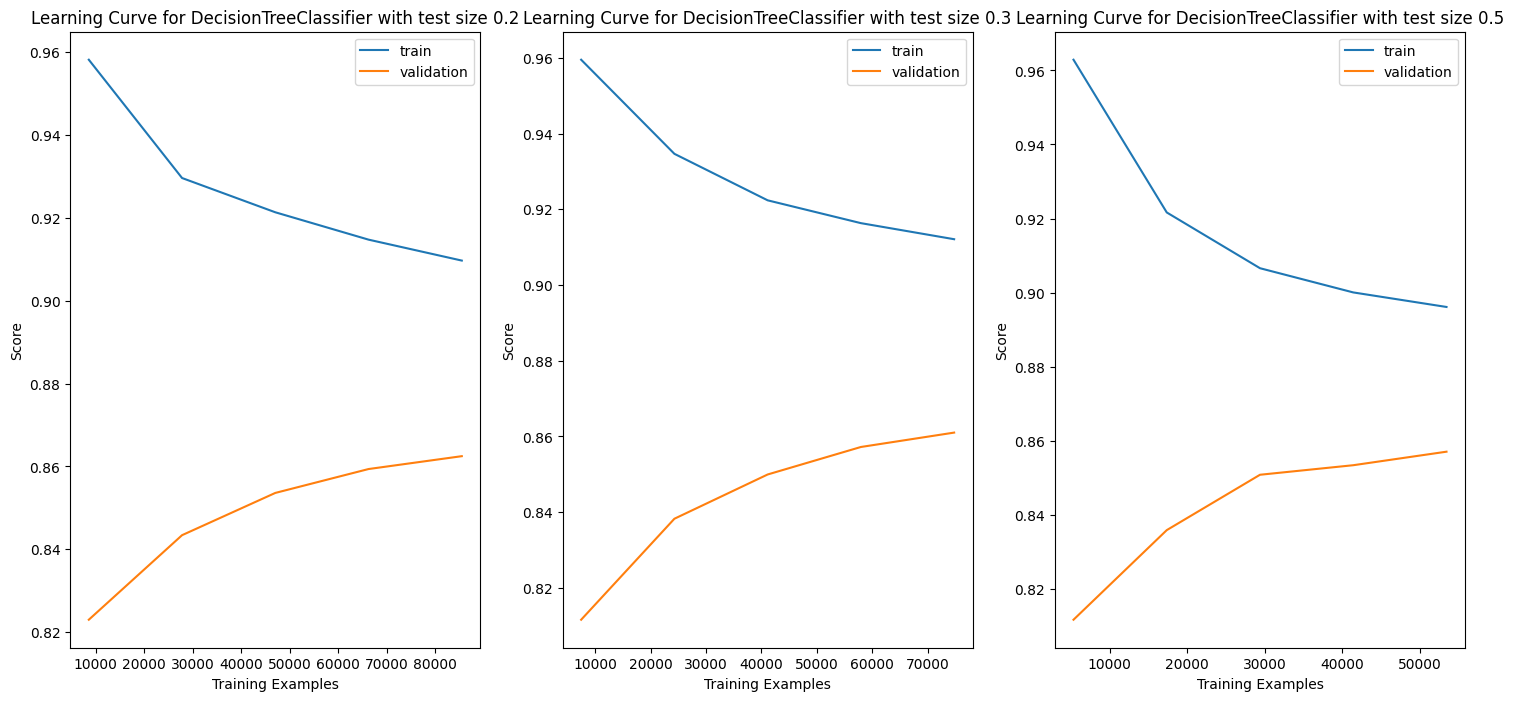

In [ ]:
dt_models = []

fig, axs = plt.subplots(1, 3, figsize=(18, 8))
for idx, split in enumerate(splits):
    X_train, _, y_train, _ = train_test_split(X, y, test_size=split/100, random_state=seed)
    param_grid = {
        "dt__criterion": ["gini", "entropy"],
        "dt__max_depth": np.arange(10, 30, 2)
    }

    pipe = Pipeline([("transformer", ct), ("dt", DecisionTreeClassifier(random_state=seed))])
    grid = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    
    dt_clf = grid.best_estimator_
    dt_models.append(dt_clf)
    plot_learning_curve(dt_clf, X_train, y_train, axs[idx])
    axs[idx].set_title(f"Learning Curve for {dt_clf[-1].__class__.__name__} with test size {split/100}")
    # metrics_table = pd.concat([metrics_table, add_grid_metrics_to_table(grid, split)])
# display(metrics_table)
best_models.append(dt_models)

# Perceptron Model 

{'p__eta0': 0.0001, 'p__max_iter': 1000}
{'p__eta0': 1.0, 'p__max_iter': 1000}
{'p__eta0': 0.0001, 'p__max_iter': 1000}


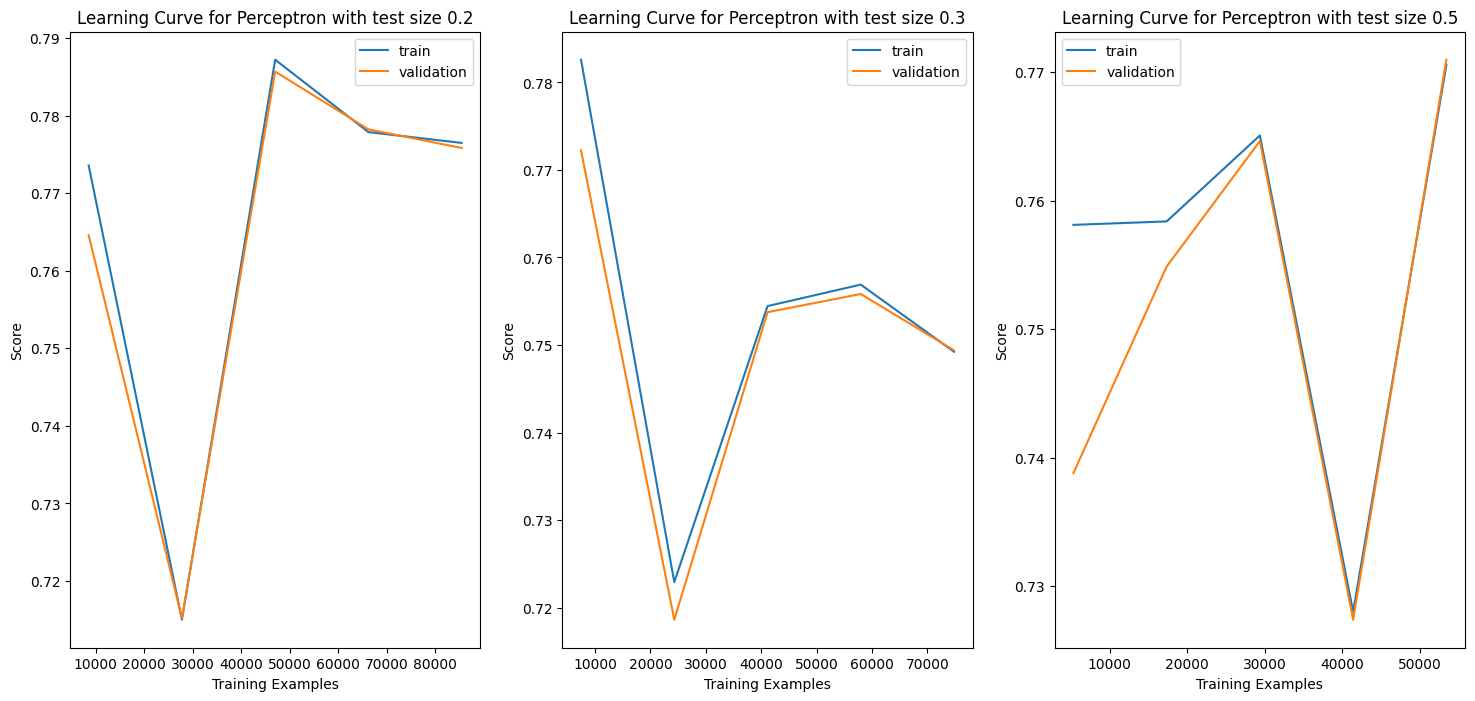

In [ ]:
p_models = []
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
for idx, split in enumerate(splits):
    X_train, _, y_train, _ = train_test_split(X, y, test_size=split/100, random_state=seed)

    pipe = Pipeline([("transformer", ct), ("p", Perceptron(random_state=seed, n_jobs=-1))])
    param_grid = {
      "p__eta0": [0.0001, 0.001, 0.01, 0.1, 1.0],
      "p__max_iter": np.arange(1000, 5000, 500)
    }
    grid = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    
    p_clf = grid.best_estimator_
    p_models.append(p_clf)
    plot_learning_curve(p_clf, X_train, y_train, axs[idx])
    axs[idx].set_title(f"Learning Curve for {p_clf[-1].__class__.__name__} with test size {split/100}")
best_models.append(p_models)

# Gaussian Naive Bayes

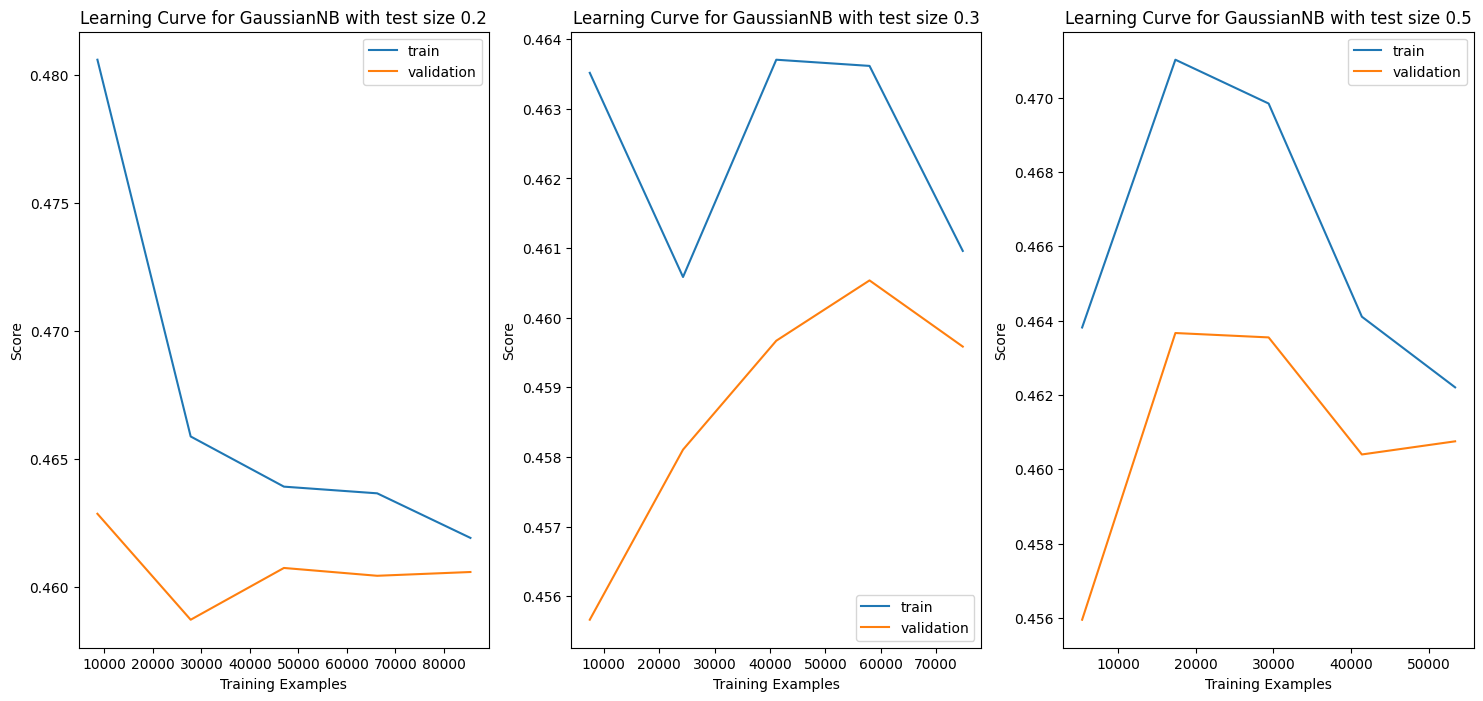

In [ ]:
gnb_models = []
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

for idx, split in enumerate(splits):
    X_train, _, y_train, _ = train_test_split(X, y, test_size=split/100, random_state=seed)

    ct_gnb = ColumnTransformer(transformers=[("cat_preprocess", one_hot, cat_features),
                                     ("num_preprocess", scaler, num_features)]
    gnb_clf = Pipeline([("transformer", ct_gnb), ("gnb", GaussianNB())])
    cv_scores = cross_validate(gnb_clf, X_train, y_train, cv=10, n_jobs=-1)
    gnb_clf.fit(X_train, y_train)

    gnb_models.append(gnb_clf)
    plot_learning_curve(gnb_clf, X_train, y_train, axs[idx])
    axs[idx].set_title(f"Learning Curve for {gnb_clf[-1].__class__.__name__} with test size {split/100}")
best_models.append(gnb_models)

# Logistic Regression

In [ ]:
import warnings
warnings.filterwarnings('ignore')
lr_models = []
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
for idx, split in enumerate(splits):
    X_train, _, y_train, _ = train_test_split(X, y, test_size=split/100, random_state=seed)
    param_grid = {
      "lr__penalty": ["l1", "l2"],
      'lr__solver': ['lbfgs', 'sag'],
      "lr__max_iter": np.arange(1000, 2000, 500)
    }

    pipe = Pipeline([("transformer", ct), ("lr", LogisticRegression(random_state=seed))])
    grid = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    
    lr_clf = grid.best_estimator_
    lr_models.append(lr_clf)
    plot_learning_curve(lr_clf, X_train, y_train, axs[idx])
    axs[idx].set_title(f"Learning Curve for {lr_clf[-1].__class__.__name__} with test size {split/100}")
    # metrics_table = pd.concat([metrics_table, add_grid_metrics_to_table(grid, split)])
# display(metrics_table)
best_models.append(lr_models)


# Linear Regression


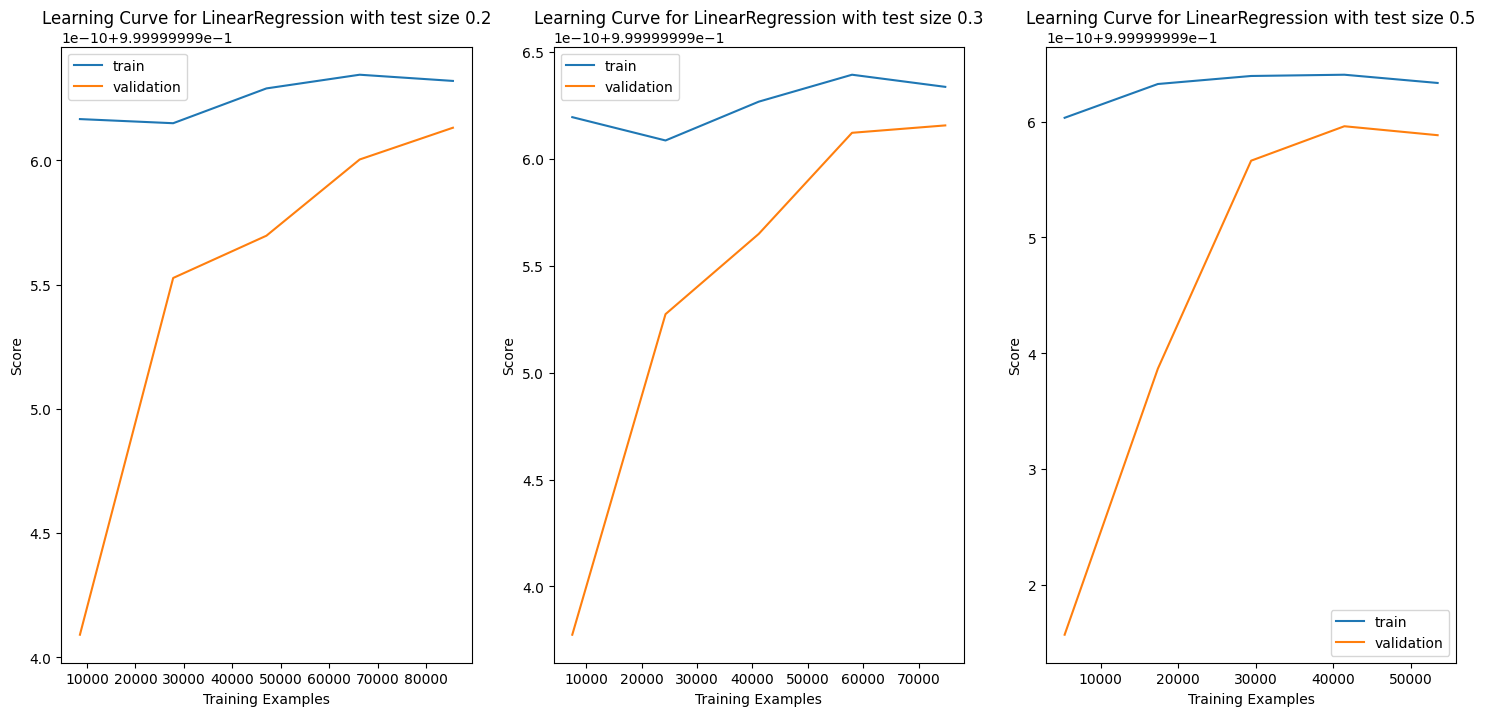

In [ ]:
lin_reg_models = []
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
for idx, split in enumerate(splits):
  X_train, _, y_train, _ = train_test_split(X, y, test_size=split/100, random_state=seed)

  lin_reg_clf = Pipeline([("transformer",ct),("lin_reg",LinearRegression())])
  lin_reg_clf.fit(X_train,y_train)
  lin_reg_models.append(lin_reg_clf)
  plot_learning_curve(lin_reg_clf, X_train, y_train, axs[idx])
  axs[idx].set_title(f"Learning Curve for {lin_reg_clf[-1].__class__.__name__} with test size {split/100}")
   
best_models.append(lin_reg_models)




# SVM - Linear Kernel

In [ ]:
svc_lin_models = []
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
for idx, split in enumerate(splits):
    X_train, _, y_train, _ = train_test_split(X, y, test_size=split/100, random_state=seed)

    svc_lin_clf = Pipeline([("transformer", ct), ("svc", SVC(random_state=seed, kernel="linear"))])
    # cv_scores = cross_validate(svc_lin_clf, X_train, y_train, cv=10, n_jobs=-1)
    svc_lin_clf.fit(X_train, y_train)

    svc_lin_models.append(svc_lin_clf)
    plot_learning_curve(svc_lin_clf, X_train, y_train, axs[idx])
    axs[idx].set_title(f"Learning Curve for {svc_lin_clf[-1].__class__.__name__} with test size {split/100}")
best_models.append(svc_lin_models)

# SVM - RBF Kernel

NameError: ignored

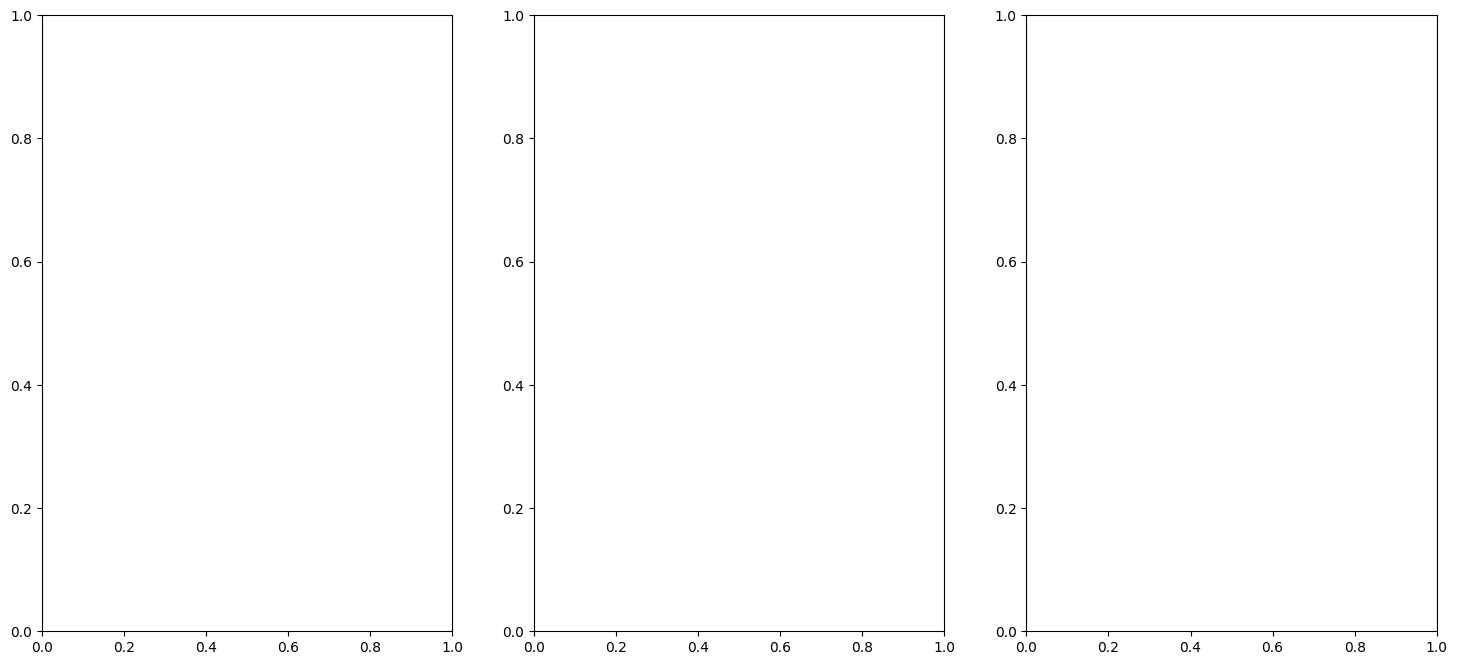

In [ ]:
svc_rbf_models = []
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
for idx, split in enumerate(splits):
    X_train, _, y_train, _ = train_test_split(X, y, test_size=split/100, random_state=seed)

    svc_clf = Pipeline([("transformer", ct), ("svc", SVC(random_state=seed, kernel="rbf"))])
    # cv_scores = cross_validate(svc_clf, X_train, y_train, cv=10, n_jobs=-1)
    svc_clf.fit(X_train, y_train)

    svc_rbf_models.append(svc_clf)
    plot_learning_curve(svc_clf, X_train, y_train, axs[idx])
    axs[idx].set_title(f"Learning Curve for {svc_clf[-1].__class__.__name__} with test size {split/100}")
best_models.append(svc_rbf_models)

# Gradient Boosting Classifier

In [ ]:
grb_models = []
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
for idx, split in enumerate(splits):
  X_train, _, y_train, _ = train_test_split(X, y, test_size=split/100, random_state=seed)

    grb_clf = Pipeline([("transformer", ct), ("grb", GradientBoostingClassifier(random_state=seed))])
    # cv_scores = cross_validate(grb_clf, X_train, y_train, cv=10, n_jobs=-1)
    grb_clf.fit(X_train, y_train)

    grb_models.append(grb_clf)
    plot_learning_curve(grb_clf, X_train, y_train, axs[idx])
    axs[idx].set_title(f"Learning Curve for {grb_clf[-1].__class__.__name__} with test size {split/100}")
best_models.append(grb_models)

# Multilayer Perceptron Classifier

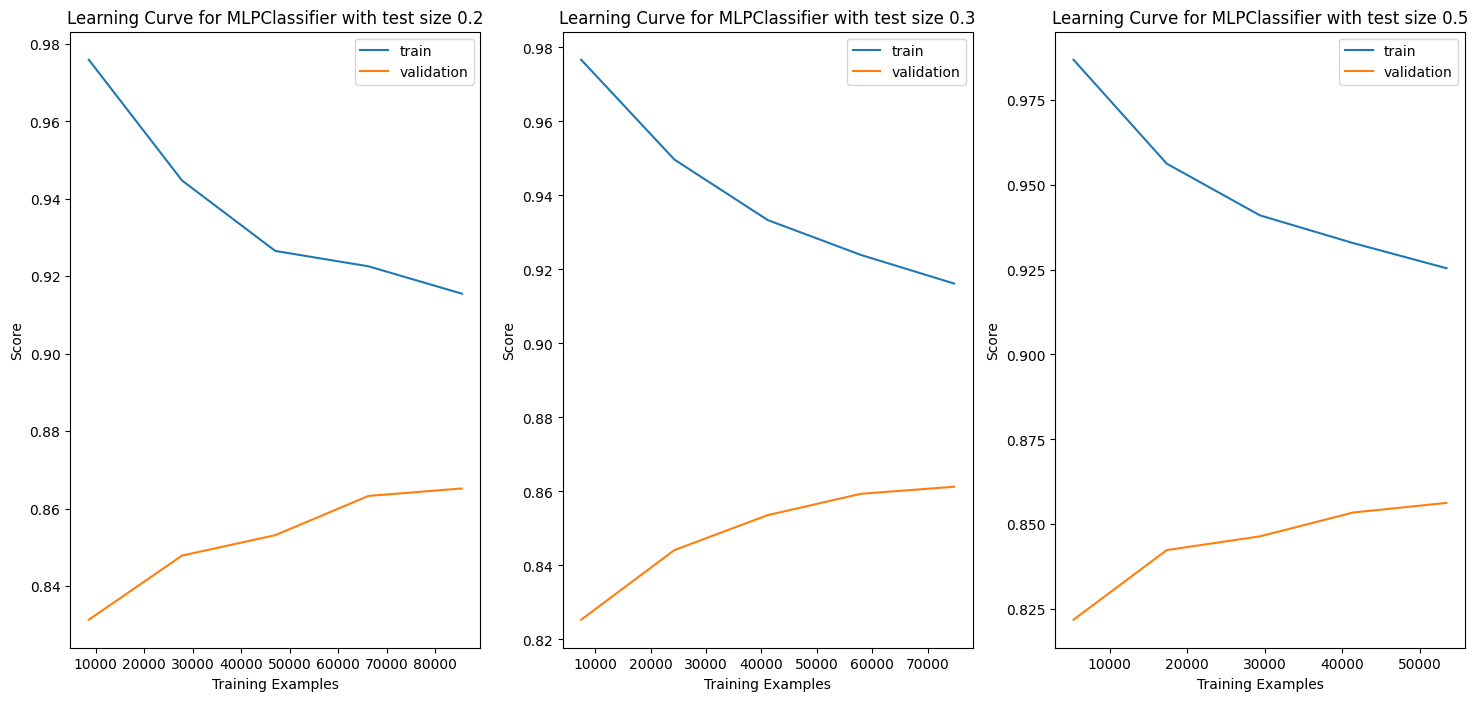

In [ ]:
mlp_models = []
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
for idx, split in enumerate(splits):
    X_train, _, y_train, _ = train_test_split(X, y, test_size=split/100, random_state=seed)

    mlp_clf = Pipeline([("transformer", ct), ("mlp", MLPClassifier(random_state=seed))])
    cv_scores = cross_validate(mlp_clf, X_train, y_train, cv=10, n_jobs=-1)
    mlp_clf.fit(X_train, y_train)

    mlp_models.append(mlp_clf)
    plot_learning_curve(mlp_clf, X_train, y_train, axs[idx])
    axs[idx].set_title(f"Learning Curve for {mlp_clf[-1].__class__.__name__} with test size {split/100}")
best_models.append(mlp_models)

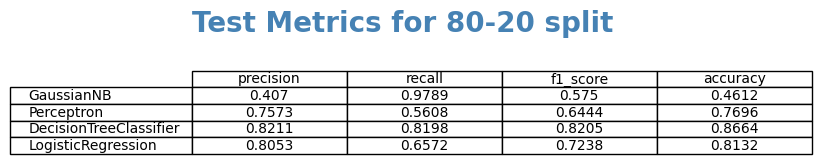

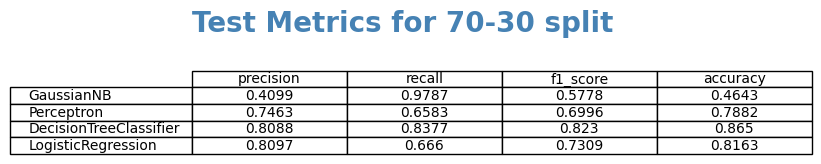

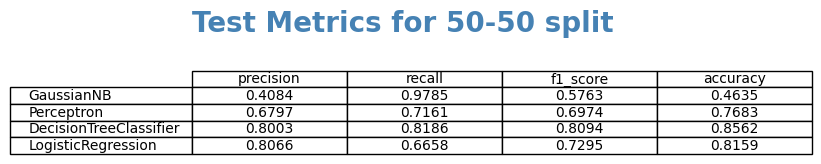

In [ ]:
display_test_metrics(best_models)

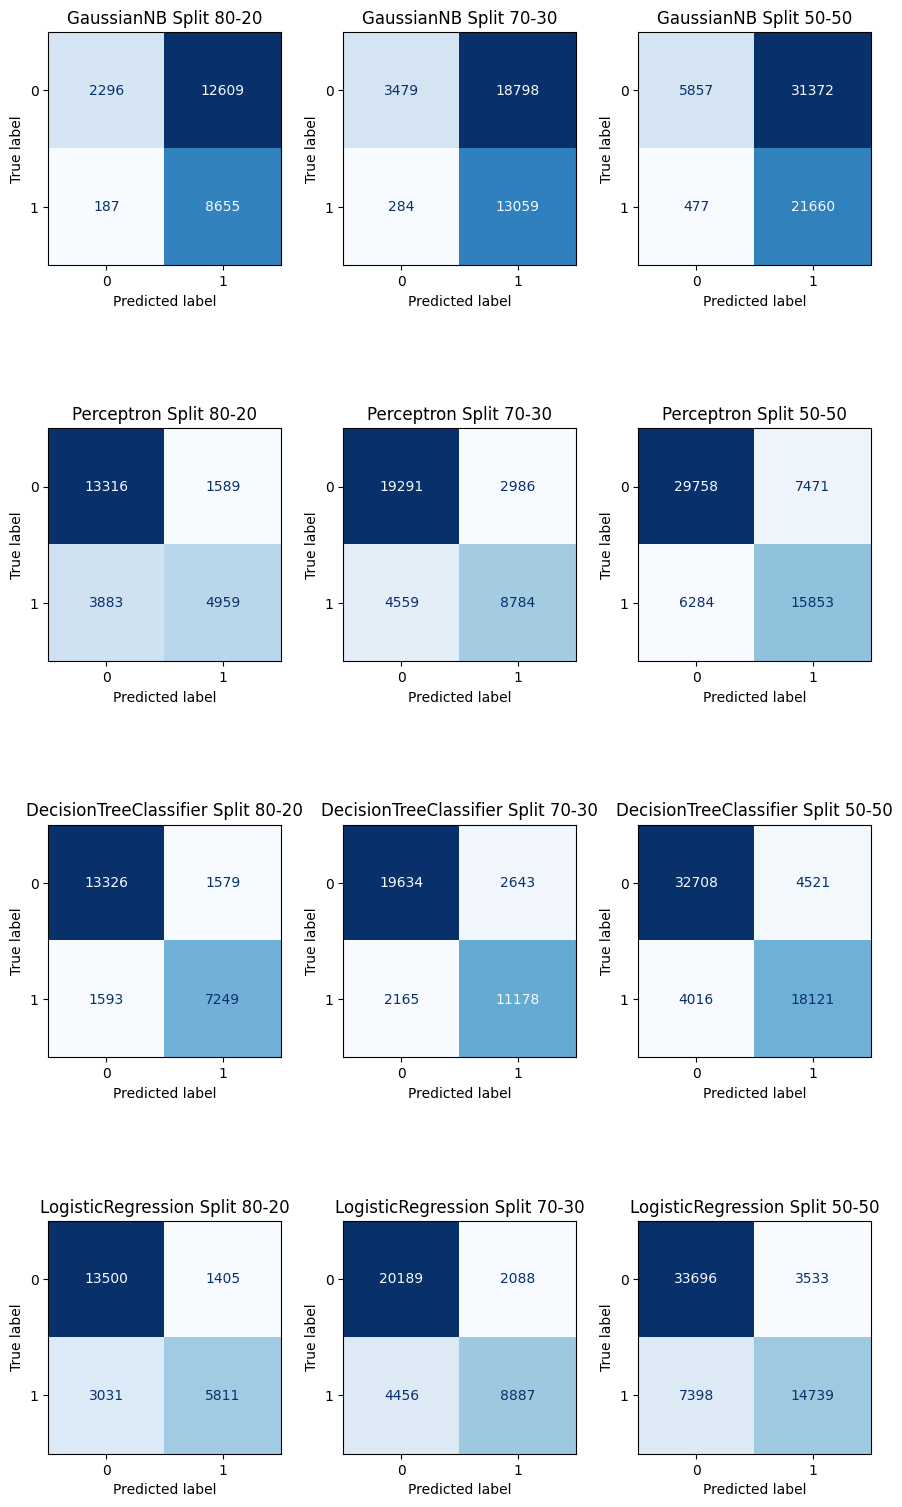

In [ ]:
plot_confusion_matrices(best_models)

# Linear Regression Model